In [1]:
# Exercise 6.40—Mini Project
# Solution from the book
image_size = (300,300)
total_pixels = image_size[0] * image_size[1]
square_count = 30
square_width = 10

def ij(n):
  return (n // image_size[0], n % image_size[1])

def to_lowres_grayscale(img):
  matrix = [[0 for i in range(0,square_count)]
            for j in range(0,square_count)
          ]
  for (n,p) in enumerate(img.pixels):
    i,j = ij(n)
    weight = 1.0 / (3 * square_width * square_width)
    matrix[i // square_width][ j // square_width] += (sum(p) * weight)
  return matrix

def from_lowres_grayscale(matrix):
  def lowres(pixels, ij):
    i,j = ij
    return pixels[i // square_width][ j // square_width]
  def make_highres(limg):
    pixels = list(matrix)
    triple = lambda x: (x,x,x)
    return ImageVector([triple(lowres(matrix, ij(n))) for n in range(0,total_pixels)])
  return make_highres(matrix)

In [16]:
from PIL import Image
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)

class ImageVector(Vector):
    size = (300,300) #1
    def __init__(self,input):
        try:
            img = Image.open(input).resize(ImageVector.size) #2
            self.pixels = img.getdata()
        except:
            self.pixels = input #3
    def image(self):
        img = Image.new('RGB', ImageVector.size) #4
        img.putdata([(int(r), int(g), int(b)) 
                     for (r,g,b) in self.pixels])
        return img
    def add(self,img2): #5
        return ImageVector([(r1+r2,g1+g2,b1+b2) 
                            for ((r1,g1,b1),(r2,g2,b2)) 
                            in zip(self.pixels,img2.pixels)])
    def scale(self,scalar): #6
        return ImageVector([(scalar*r,scalar*g,scalar*b) 
                      for (r,g,b) in self.pixels])
    @classmethod
    def zero(cls): #7
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0,0,0) for _ in range(0,total_pixels)])
    def _repr_png_(self): #8
        return self.image()._repr_png_()

img = Image.open('/content/photo_2022-08-17_15-13-30.jpg').resize(image_size)
pixels = list(img.getdata())
pixels[:10]

[(248, 252, 255),
 (252, 252, 246),
 (252, 253, 252),
 (254, 254, 248),
 (255, 253, 255),
 (253, 255, 255),
 (254, 255, 255),
 (254, 252, 253),
 (252, 253, 250),
 (249, 254, 248)]

In [17]:
matrix = [[0 for i in range(0,square_count)]
          for j in range(0,square_count)
        ]

for (n,p) in enumerate(pixels):
  i,j = ij(n)
  weight = 1.0 / (3 * square_width * square_width)
  matrix[i // square_width][ j // square_width] += (sum(p) * weight)
matrix

[[235.82666666666674,
  199.7133333333334,
  152.62666666666672,
  172.3266666666667,
  182.07000000000002,
  176.88666666666666,
  185.83666666666662,
  135.52000000000004,
  77.17000000000003,
  87.45999999999998,
  69.78000000000003,
  58.86999999999999,
  132.22333333333333,
  117.78,
  122.19333333333334,
  122.98333333333332,
  125.62666666666671,
  112.53333333333335,
  133.5433333333333,
  101.03000000000002,
  247.70666666666665,
  226.75333333333333,
  69.43333333333335,
  64.56333333333335,
  57.509999999999984,
  58.63000000000002,
  30.383333333333336,
  27.77,
  7.893333333333334,
  4.8833333333333355],
 [235.52000000000004,
  117.94999999999997,
  122.33000000000003,
  137.61333333333332,
  151.40666666666658,
  114.95000000000003,
  165.35000000000002,
  103.44999999999997,
  74.16333333333338,
  65.89999999999999,
  64.31666666666668,
  63.33666666666668,
  154.56999999999996,
  116.2333333333333,
  116.51,
  110.96333333333332,
  119.62,
  143.34666666666675,
  135.03

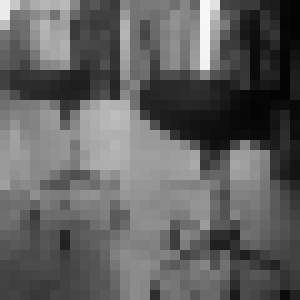

In [18]:
def my_to_lowres_grayscale(img):
  pixels = list(img.getdata())
  matrix = [[0 for i in range(0,square_count)]
            for j in range(0,square_count)
          ]
  for (n,p) in enumerate(pixels):
    i,j = ij(n)
    weight = 1.0 / (3 * square_width * square_width)
    matrix[i // square_width][ j // square_width] += (sum(p) * weight)
  return matrix

# Calling from_lowres_grayscale(to_lowres_grayscale(img)) transforms the image img in the way I showed in the chapter.
from_lowres_grayscale(my_to_lowres_grayscale(img))

In [19]:
new_img = img.resize((30,30))
new_img.size

(30, 30)

In [22]:
new_img

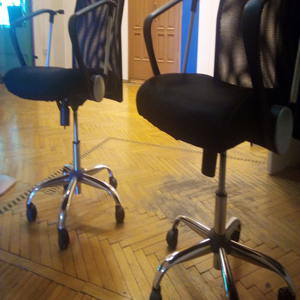

In [23]:
img